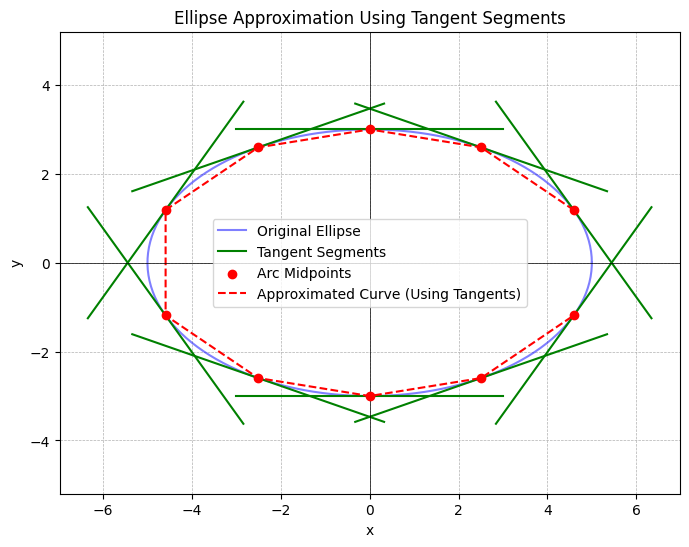

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

a, b = 5, 3
n = 10

def arc_length_integrand(t):
    return np.sqrt((a * np.sin(t))**2 + (b * np.cos(t))**2)

t_values = np.linspace(0, 2*np.pi, 1000)
arc_lengths = np.array([quad(arc_length_integrand, 0, t)[0] for t in t_values])

arc_lengths /= arc_lengths[-1]

equal_arc_lengths = np.linspace(0, 1, n + 1)
t_interpolated = interp1d(arc_lengths, t_values)(equal_arc_lengths)

t_midpoints = interp1d(arc_lengths, t_values)(np.linspace(0.5/n, 1 - 0.5/n, n))

x_midpoints = a * np.cos(t_midpoints)
y_midpoints = b * np.sin(t_midpoints)

dx_midpoints = -a * np.sin(t_midpoints)
dy_midpoints = b * np.cos(t_midpoints)

norms = np.sqrt(dx_midpoints**2 + dy_midpoints**2)
dx_unit = dx_midpoints / norms
dy_unit = dy_midpoints / norms

s_values = np.linspace(-3, 3, 2)
tangent_x = np.outer(dx_unit, s_values) + x_midpoints[:, None]
tangent_y = np.outer(dy_unit, s_values) + y_midpoints[:, None]

theta = np.linspace(0, 2*np.pi, 300)
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)

plt.figure(figsize=(8,6))
plt.plot(x_ellipse, y_ellipse, label="Original Ellipse", color="blue", alpha=0.5)

for i in range(n):
    plt.plot(tangent_x[i], tangent_y[i], 'g-', linewidth=1.5, label="Tangent Segments" if i == 0 else "")

plt.scatter(x_midpoints, y_midpoints, color="red", label="Arc Midpoints", zorder=3)

plt.plot(x_midpoints, y_midpoints, 'r--', label="Approximated Curve (Using Tangents)")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Ellipse Approximation Using Tangent Segments")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


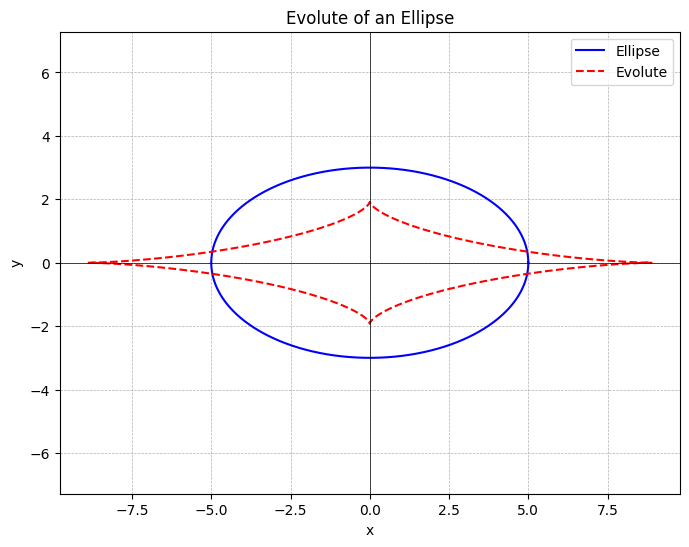

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Given ellipse parameters
a, b = 5, 3  # Semi-axes

# Generate parameter values t
t = np.linspace(0, 2 * np.pi, 5000)

# Ellipse parametric equations
x_ellipse = a * np.cos(t)
y_ellipse = b * np.sin(t)

# Evolute equations
x_evolute = (a - (a**3 / b**2)) * np.cos(t)**3
y_evolute = (b - (b**3 / a**2)) * np.sin(t)**3

# Plot ellipse
plt.figure(figsize=(8,6))
plt.plot(x_ellipse, y_ellipse, label="Ellipse", color="blue")

# Plot evolute
plt.plot(x_evolute, y_evolute, label="Evolute", color="red", linestyle="dashed")

# Formatting
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Evolute of an Ellipse")
plt.legend()
plt.axis("equal")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()
